In [ ]:
#downloading the dataset from kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:10<00:00, 223MB/s]
100% 1.06G/1.06G [00:10<00:00, 113MB/s]


In [3]:
import zipfile
zip= zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip.extractall('/content')
zip.close()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import models, layers

In [5]:
#using generators
train_ds= keras.utils.image_dataset_from_directory(
    directory= '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size= 50,
    image_size= (250,250)
)

test_ds= keras.utils.image_dataset_from_directory(
    directory= '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size= 50,
    image_size= (250,250)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
type(train_ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [7]:
#Normalize
def normal(image, label):
  image= tf.cast(image/255, tf.float32)
  return image,label

In [8]:
train_ds= train_ds.map(normal)
test_ds= test_ds.map(normal)

In [16]:
#Creating CNN model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model1= keras.Sequential()

model1.add(Conv2D(64, (4,4), padding='valid', activation='relu', input_shape=(250,250,3)))
model1.add(MaxPooling2D((3,3), padding='valid', strides=2))

model1.add(Conv2D(128, (4,4), padding='valid', activation='relu'))
model1.add(MaxPooling2D((3,3), padding='valid', strides=2))

model1.add(Conv2D(326, (4,4), padding='valid', activation='relu',))
model1.add(MaxPooling2D((3,3), padding='valid', strides=2))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 247, 247, 64)        │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 123, 123, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 120, 120, 128)       │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 59, 59, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 326)         │         667,974 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 27, 27, 326)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 237654)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      30,419,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,231,067 (119.14 MB)

 Trainable params: 31,231,067 (119.14 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [19]:
history= model1.fit(train_ds,epochs=10, validation_data=test_ds)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 136s 295ms/step - accuracy: 0.5578 - loss: 0.7645 - val_accuracy: 0.7034 - val_loss: 0.5697
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 121s 283ms/step - accuracy: 0.7308 - loss: 0.5390 - val_accuracy: 0.7820 - val_loss: 0.4653
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 113s 283ms/step - accuracy: 0.7884 - loss: 0.4501 - val_accuracy: 0.7848 - val_loss: 0.4535
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 143s 285ms/step - accuracy: 0.8328 - loss: 0.3720 - val_accuracy: 0.8046 - val_loss: 0.4357
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 114s 285ms/step - accuracy: 0.8828 - loss: 0.2723 - val_accuracy: 0.8172 - val_loss: 0.5002
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 144s 290ms/step - accuracy: 0.9306 - loss: 0.1753 - val_accuracy: 0.8102 - val_loss: 0.5890
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 113s 283ms/step - accuracy: 0.9581 - loss: 0.1058 - val_accuracy: 0.7964 - val_loss: 0.7976
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 145s 290ms/step - accuracy: 0.9726 -

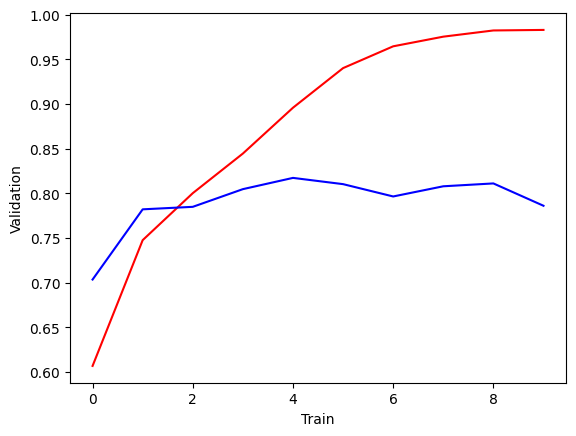

In [20]:
plt.plot(history.history['accuracy'], color='red', )
plt.plot(history.history['val_accuracy'], color='blue')
plt.xlabel('Train')
plt.ylabel('Validation')
plt.show()

TESTING OUT MODEL USING IMAGES.

In [21]:
import cv2

In [49]:
def testing(link):
  img=cv2.imread(link)
  plt.imshow(img)

  print("shape is: ",img.shape,'\n')
  img= cv2.resize(img,(250,250))
  tester= img.reshape(((1,250,250,3)))
  print("\n Now the shape is: ",img.shape,'\n')
  pred= model1.predict(tester)
  if(pred[0]==0.):
    print("\n MODEL PREDICTION IS: ",'Cat !',"\n")
  else:
    print("\n MODEL PREDICTION IS: ","Dog !","\n")



shape is:  (800, 800, 3) 


 Now the shape is:  (250, 250, 3) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

 MODEL PREDICTION IS:  Dog ! 



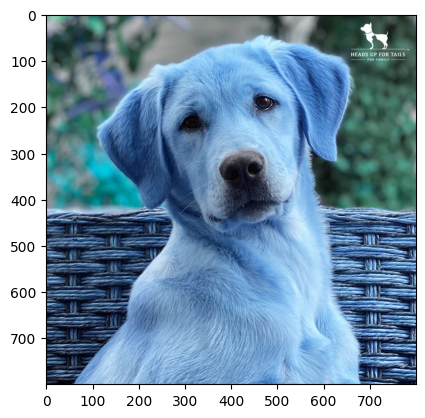

In [53]:
testing('/content/dog.webp')

shape is:  (2804, 1862, 3) 


 Now the shape is:  (250, 250, 3) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

 MODEL PREDICTION IS:  Cat ! 



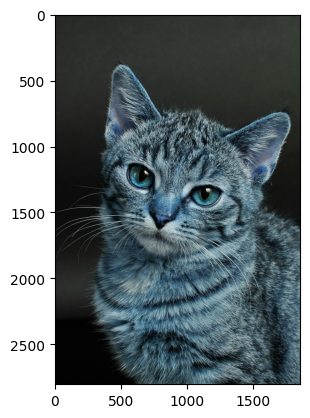

In [54]:
testing('/content/cat.jpg')